# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 589


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city.replace(" ","+")
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather =  requests.get(city_url + city).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat =  city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lng"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["country"]
        city_date = city_weather["date"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval 
-----------------------------
Processing Record 1 of Set 1 : bredasdorp
City not found. Skipping...
Processing Record 2 of Set 1 : bubaque
Processing Record 3 of Set 1 : cherskiy
Processing Record 4 of Set 1 : torbay
Processing Record 5 of Set 1 : rikitea
Processing Record 6 of Set 1 : mar del plata
Processing Record 7 of Set 1 : cabo san lucas
City not found. Skipping...
Processing Record 8 of Set 1 : namibe
Processing Record 9 of Set 1 : belyy yar
Processing Record 10 of Set 1 : jamestown
Processing Record 11 of Set 1 : chokurdakh
Processing Record 12 of Set 1 : georgetown
Processing Record 13 of Set 1 : ponta do sol
Processing Record 14 of Set 1 : busselton
Processing Record 15 of Set 1 : esperance
Processing Record 16 of Set 1 : kindu
Processing Record 17 of Set 1 : kapaa
Processing Record 18 of Set 1 : hilo
Processing Record 19 of Set 1 : ushuaia
Processing Record 20 of Set 1 : qaqortoq
Processing Record 21 of Set 1 : bairiki
Processing Record 22 of Set 1

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame({
    "City": city_name_list,
    "Lat": lat_list,
    "Lng": lng_list,
    "Max Temp": max_temp_list,
    "Humidity": humidity_list,
    "Cloudiness": cloudiness_list,
    "Wind Speed": wind_speed_list,
    "Country": country_list,
    "Date": date_list
})

# Show Record Count
city_data_df.count()

City          533
Lat           533
Lng           533
Max Temp      533
Humidity      533
Cloudiness    533
Wind Speed    533
Country       533
Date          533
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bredasdorp,-34.5322,20.0403,58.91,93,3,5.08,ZA,1680325314
1,Bubaque,11.2833,-15.8333,77.41,77,5,11.59,GW,1680325314
2,Cherskiy,68.7500,161.3000,1.15,91,100,17.02,RU,1680325314
3,Torbay,47.6666,-52.7314,27.27,93,40,8.99,CA,1680325314
4,Rikitea,-23.1203,-134.9692,80.02,76,66,9.71,PF,1680325314


In [9]:
 #Convert data strings to float
pd.to_numeric(city_data_df["Cloudiness"]).astype(float)
pd.to_numeric(city_data_df["Humidity"]).astype(float)
pd.to_numeric(city_data_df["Lat"]).astype(float)
pd.to_numeric(city_data_df["Lng"]).astype(float)
pd.to_numeric(city_data_df["Max Temp"]).astype(float)
pd.to_numeric(city_data_df["Wind Speed"]).astype(float)
city_data_df
# Export the City_Data into a csv
city_data_df.to_csv("city.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("city.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Bredasdorp,-34.5322,20.0403,58.91,93,3,5.08,ZA,1680325314
1,Bubaque,11.2833,-15.8333,77.41,77,5,11.59,GW,1680325314
2,Cherskiy,68.7500,161.3000,1.15,91,100,17.02,RU,1680325314
3,Torbay,47.6666,-52.7314,27.27,93,40,8.99,CA,1680325314
4,Rikitea,-23.1203,-134.9692,80.02,76,66,9.71,PF,1680325314


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

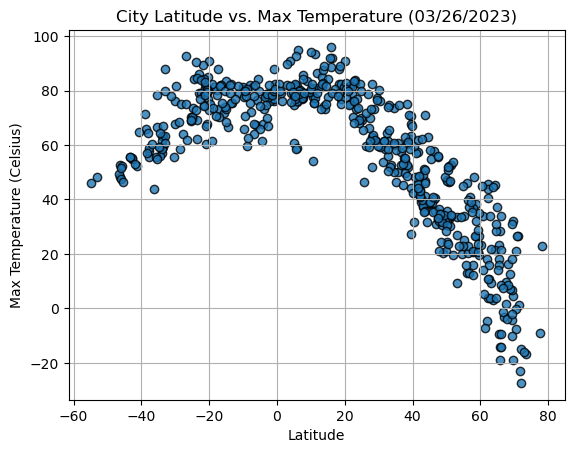

In [10]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (03/26/2023)" )
plt.ylabel("Max Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("City Latitude vs. Max Temperature.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

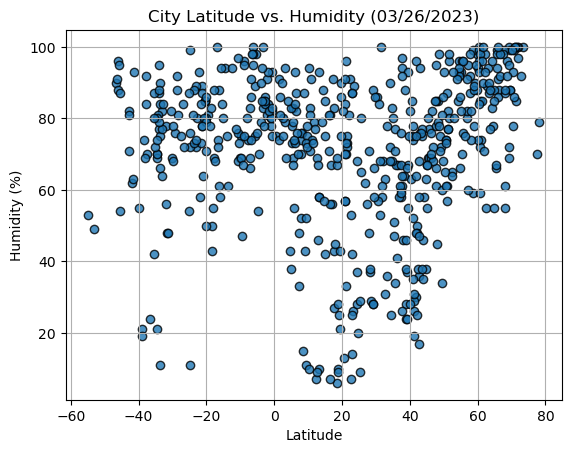

In [11]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (03/26/2023)" )
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("City Latitude vs. Humidity.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

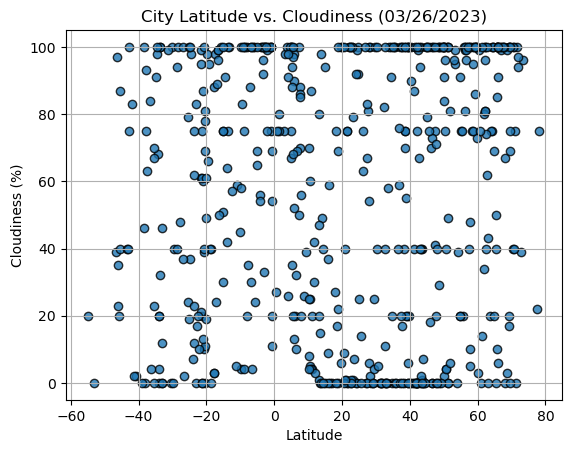

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (03/26/2023)" )
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("City Latitude vs. Cloudiness .png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

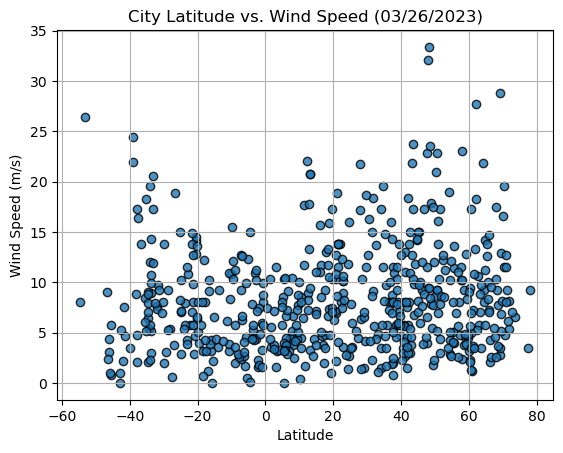

In [13]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (03/26/2023)" )
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("City Latitude vs. Wind Speed .png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [19]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()
    
    # Print r square value
    print(f"The r-value is: {r_value**2}")

In [20]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [21]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,Bubaque,11.2833,-15.8333,77.41,77,5,11.59,GW,1680325314
2,Cherskiy,68.7500,161.3000,1.15,91,100,17.02,RU,1680325314
3,Torbay,47.6666,-52.7314,27.27,93,40,8.99,CA,1680325314
6,Cabo San Lucas,22.8909,-109.9124,73.51,69,100,6.26,MX,1680325315
8,Belyy Yar,53.6039,91.3903,17.49,50,20,13.42,RU,1680325315


In [22]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Bredasdorp,-34.5322,20.0403,58.91,93,3,5.08,ZA,1680325314
4,Rikitea,-23.1203,-134.9692,80.02,76,66,9.71,PF,1680325314
5,Mar del Plata,-38.0023,-57.5575,57.94,68,75,9.22,AR,1680325314
7,Mossamedes,-15.1961,12.1522,73.94,82,93,2.10,AO,1680325315
13,Busselton,-33.6500,115.3333,70.79,68,12,4.29,AU,1680325240


###  Temperature vs. Latitude Linear Regression Plot

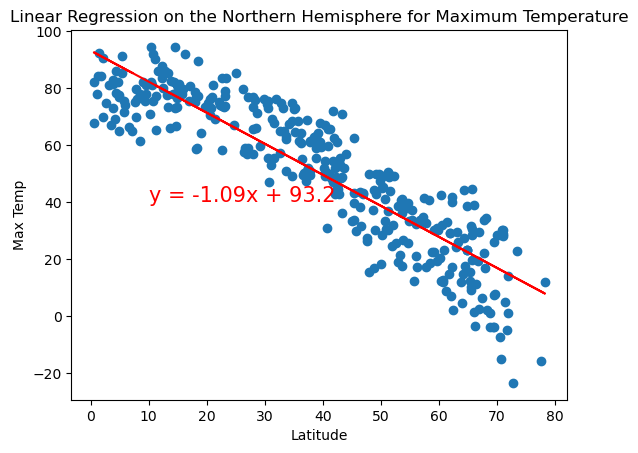

The r-value is: 0.8020000597750574


In [23]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plt.title('Linear Regression on the Northern Hemisphere for Maximum Temperature')
# Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,40))

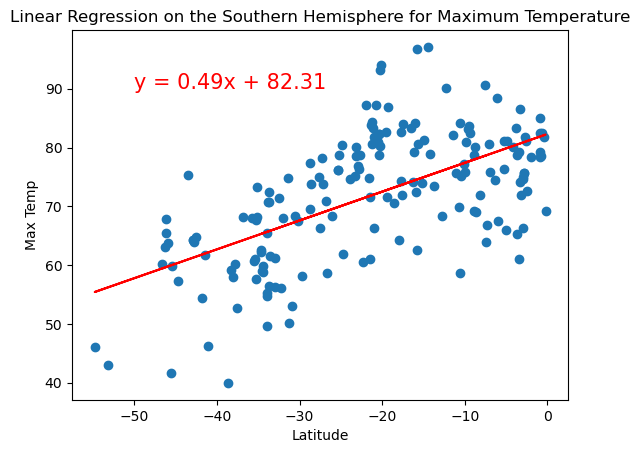

The r-value is: 0.3759477249918815


In [24]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plt.title('Linear Regression on the Southern Hemisphere for Maximum Temperature')
# Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))

**Discussion about the linear relationship:** 
*For Northen Hemisphere we have the linear regression with equation y= -1.09x+ 93.2
The negative slope that in our case is -1.09 indicates that we have an inverse relationship between the latitude and max temerature. This mean that when latitude increases when is going near to the north the maximum temperature decreases.
And the r-value  0.8 indicates that 80% of the variability can expleid by the linear relationship.
*For Southern  Hemisphere we have the linear regression with equation y= 0.49x+ 82.31
The positive  slope that in our case is o.49 indicates that we have a direct  relationship between the latitude and max temerature. This mean that when latitude increases when is moving southward the maximum temperature increases.
And the r-squared 0.38 indicates that 38% of the variability can expleid by the linear relationship.

** We have a strong correlation in Northen Hemispher and a week correlation in Southen Hemispher.

### Humidity vs. Latitude Linear Regression Plot

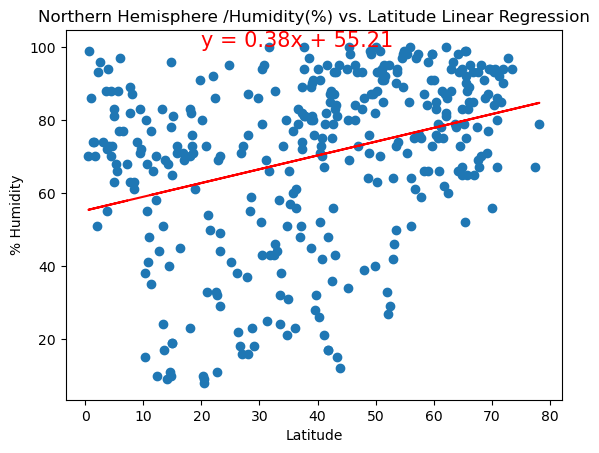

The r-value is: 0.10760778931266224


In [26]:
# Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plt.title('Northern Hemisphere /Humidity(%) vs. Latitude Linear Regression')
# Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(20,100))

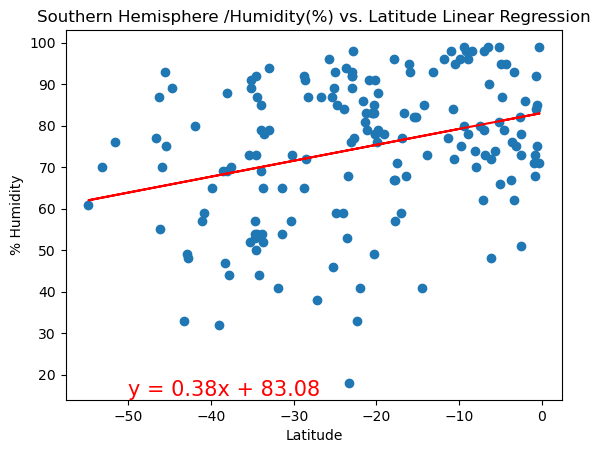

The r-squared is: 0.09643499163994401


In [26]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plt.title('Southern Hemisphere /Humidity(%) vs. Latitude Linear Regression')
# Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))


**Discussion about the linear relationship:** 
*For Northen Hemisphere we have the linear regression with equation y= 0.38x + 55.21 . This mean that for every unit increase in latitude, we can expect an increase of 0.38 units in humidity.We have also and  the r-value, of 0.11 indicates that only 11% of the variance in the humidity can be explained by the linear relationship with the independent variable. 
* For Southen Hemisphere we have the linear regression with equation y= 0.38x + 83.08 . This mean that for every unit increase in latitude, we can expect an increase of 0.38 units in humidity.We have also and  the r-value, of 0.096 indicates that only 9.6 % of the variance in the humidity can be explained by the linear relationship with the independent variable. 

** We don't have correlation between latitude and humidity.

### Cloudiness vs. Latitude Linear Regression Plot

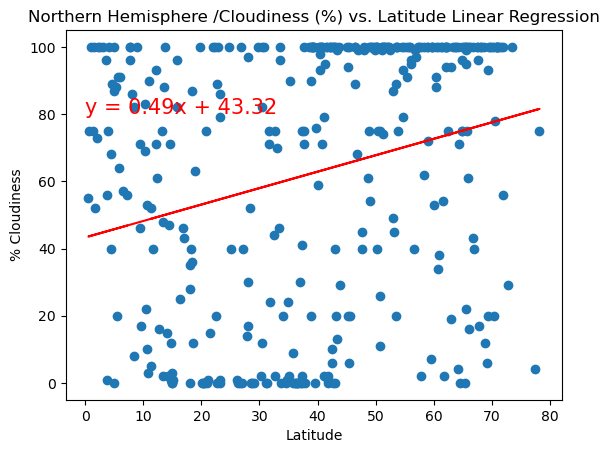

The r-value is: 0.06567855781705137


In [30]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plt.title('Northern Hemisphere /Cloudiness (%) vs. Latitude Linear Regression')
# Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(0,80))

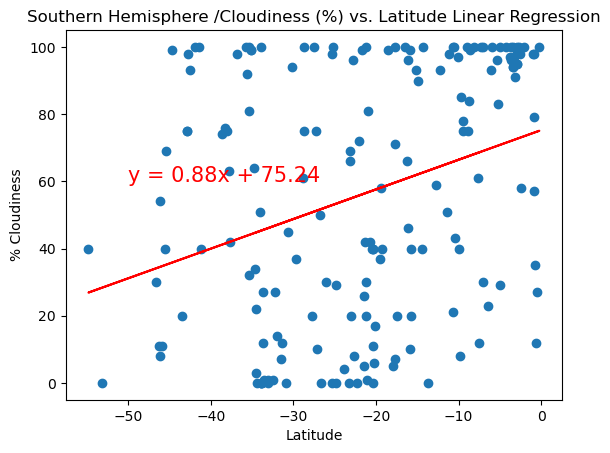

The r-value is: 0.10199229213720482


In [31]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plt.title('Southern Hemisphere /Cloudiness (%) vs. Latitude Linear Regression')
# Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,10))

**Discussion about the linear relationship:** 
*For Northen Hemisphere we have the linear regression with equation y= 0.49x+ 43.32.
The positive slope that in our case is 0.49  mean that for every degree increase in latitude there is a predicted increase of 0.49 units of cloudiness.
And the r-squared 0.066 indicates that 6.6% of the variability can expleid by the linear relationship.
*For Southern  Hemisphere we have the linear regression with equation y= 0.88x+ 75.24
The positive slope that in our case is 0.88  mean that for every degree increase in latitude there is a predicted increase of 0.88 units of cloudiness.
And the r-squared 0.1 indicates that 10 % of the variability can expleid by the linear relationship.

**In both hemispheres we have  a very weak positive correlation between cloudiness and latitude.
This means that there are likely other factors that influencing cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

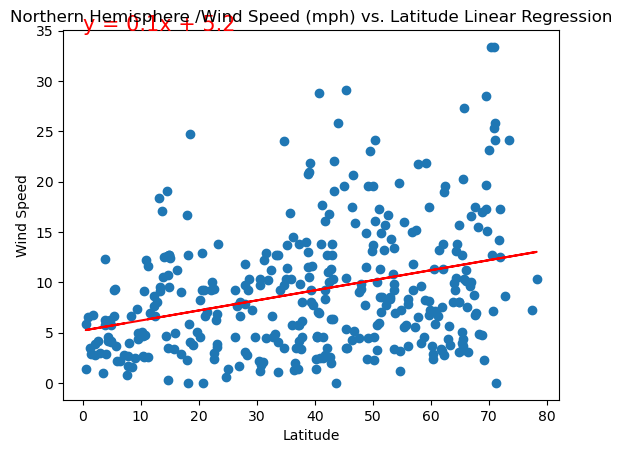

The r-value is: 0.10737086131635921


In [32]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plt.title('Northern Hemisphere /Wind Speed (mph) vs. Latitude Linear Regression')
# Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(0,80))

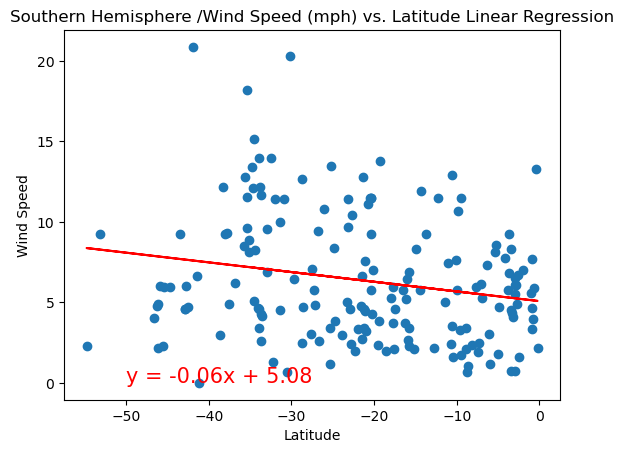

The r-value is: 0.043110569655186046


In [33]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plt.title('Southern Hemisphere /Wind Speed (mph) vs. Latitude Linear Regression')
# Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,0))

**Discussion about the linear relationship:** 
*For Northen Hemisphere we have the linear regression with equation y= 0.1x + 5.2 .This mean that for every unit increase in latitude, we can expect an increase of 0.1 units in wind speed.The  r-value, of 0.11 indicates that only 11% of the variance in the wind speed can be explained by the linear relationship with the independent variable.
*For Southen Hemisphere we have the linear regression with equation y= -0.06x+ 5.08.There is a negative linear relationship, for every unit increase in latitude, we can expect a decrease of 0.06 units in wind speed.The  r-value, of 0.043 indicates that only 4.3% of the variance in the wind speed can be explained by the linear relationship with the independent variable.

**In both hemispheres we have  a very weak correlation between wind speed and latitude.
This means that there are likely other factors that influencing wind speed.